<a href="https://colab.research.google.com/github/luisgdelafuente/emergence/blob/main/ants_pheromone_trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

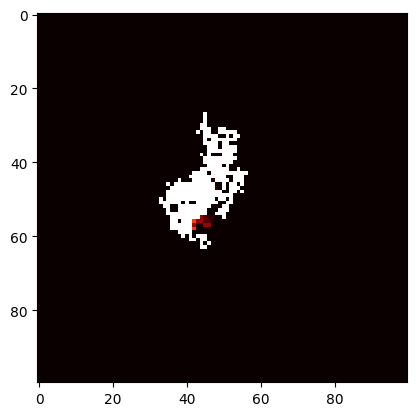

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parameters for the simulation
grid_size = 100
num_ants = 500
food_location = (grid_size // 2, grid_size // 2)
food_amount = 2000
pheromone_evaporation = 0.95
ant_movement_chance = 0.8

# Initialize the grid and pheromone levels
grid = np.zeros((grid_size, grid_size))
grid[food_location] = food_amount

# Initialize the ants' positions randomly
ants = np.random.randint(grid_size, size=(num_ants, 2))

# Function to update the positions and pheromone levels of the ants
def update_ants(frameNum, grid, ants):
    new_ants = np.copy(ants)

    for i in range(num_ants):
        x, y = ants[i]
        pheromone_level = grid[x, y]

        # Move the ant based on pheromone levels
        if np.random.rand() < ant_movement_chance:
            dx, dy = np.random.choice([-1, 0, 1]), np.random.choice([-1, 0, 1])
            new_x, new_y = (x + dx) % grid_size, (y + dy) % grid_size

            # Update the ant's position and pheromone trail
            new_ants[i] = (new_x, new_y)
            grid[new_x, new_y] += pheromone_level

    # Evaporate pheromones over time
    grid *= pheromone_evaporation

    ants[:] = new_ants[:]

    # Update the image object with the new grid data
    img.set_array(grid)
    return img,

# Create a figure and plot the grid
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='hot', interpolation='nearest', vmin=0, vmax=food_amount)

# Function to initialize the animation
def init():
    img.set_data(grid)
    return img,

# Create animation
ani = animation.FuncAnimation(fig, update_ants, fargs=(grid, ants),
                              frames=200, init_func=init, interval=100, blit=True)

# Display the animation
HTML(ani.to_jshtml())
